## Classifying images using Convolutional Neural Networks

In [1]:
# Desciption: This program will classify images 

In [2]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

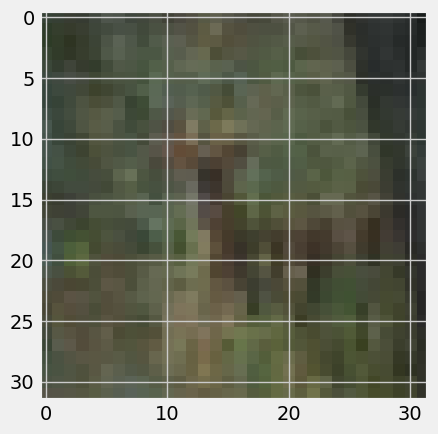

In [7]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [8]:
# Get the image label
print('The Image Label is:', y_train[index])

The Image Label is: [4]


In [9]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']
# Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [10]:
# Convert the labels into a set of ten numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
# Print the new label of the image/picture above
print("The one hot label is:", y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

C:\Users\dukea_6wbfoy1\.conda\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [17]:
# Train the model
hist = model.fit(
    x_train,
    y_train_one_hot,
    batch_size=256,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.3237 - loss: 1.8073 - val_accuracy: 0.4373 - val_loss: 1.5238
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.4658 - loss: 1.4443 - val_accuracy: 0.5188 - val_loss: 1.3261
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.5312 - loss: 1.2912 - val_accuracy: 0.5458 - val_loss: 1.2744
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.5777 - loss: 1.1786 - val_accuracy: 0.5991 - val_loss: 1.1269
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 175ms/step - accuracy: 0.6127 - loss: 1.0802 - val_accuracy: 0.6081 - val_loss: 1.1362
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.6361 - loss: 1.0142 - val_accuracy: 0.6449 - val_loss: 1.0042
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.6672 - loss: 0.9411 - val_accuracy: 0.6371 - val_loss: 1.0249
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - accuracy: 0.6864 - loss: 0

In [18]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6687 - loss: 0.9635


0.6686999797821045

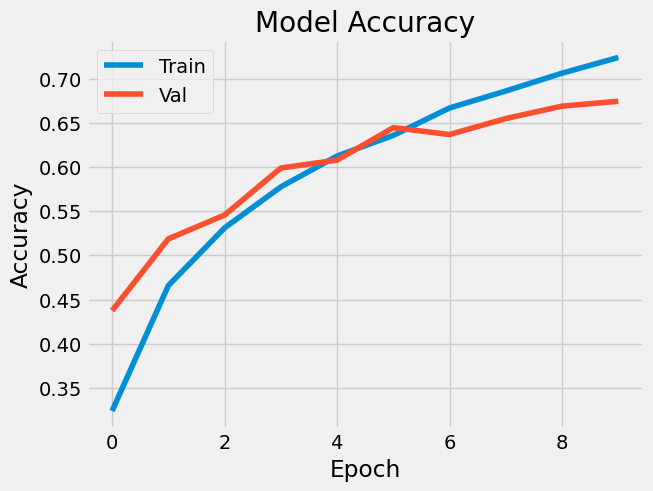

In [19]:
# Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

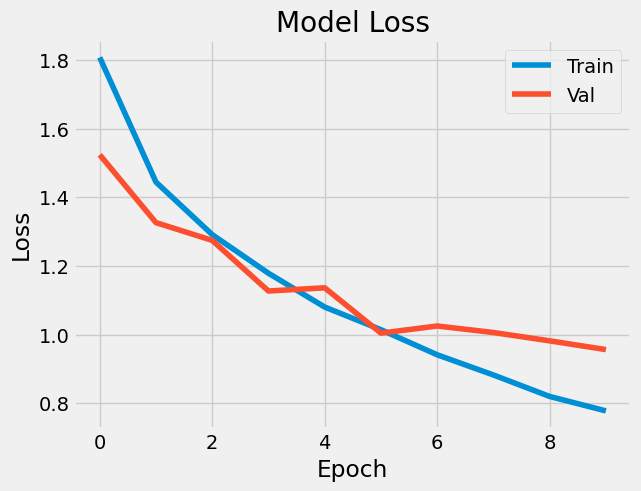

In [20]:
# Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [25]:
# Test the model with an example
test_img = plt.imread('cat.jpg')

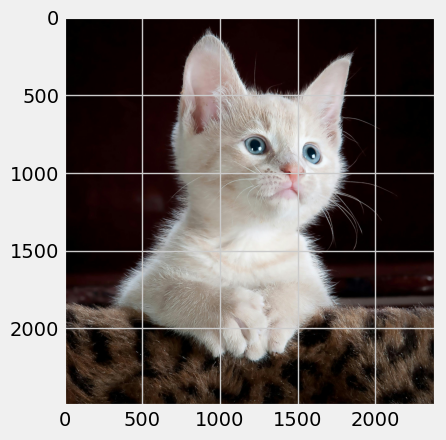

In [26]:
new_img = plt.imshow(test_img)

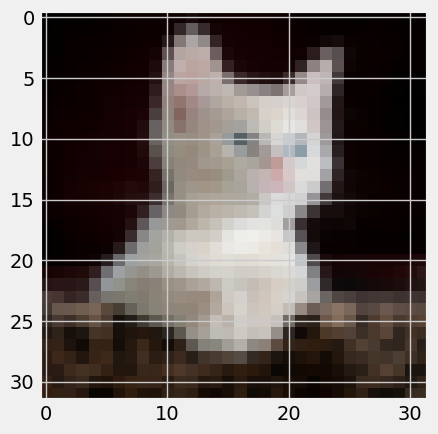

In [36]:
# Resize the image
from skimage.transform import resize

resized_img = resize(image=new_img.get_array(), output_shape=(32,32,3))
img = plt.imshow(resized_img)

In [46]:
resized_img.shape, type(resized_img)

((32, 32, 3), numpy.ndarray)

In [47]:
resized_batch = np.expand_dims(resized_img, axis=0)

In [48]:
# Get the models predictions
predictions = model.predict(resized_batch)
# Show the predictions
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


array([[4.1895660e-04, 9.2461250e-06, 8.8510392e-03, 9.1122234e-01,
        1.3076678e-02, 5.4726142e-02, 1.1000117e-02, 4.0754944e-04,
        2.1319532e-04, 7.4769341e-05]], dtype=float32)

In [49]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]

x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

In [50]:
# Show the sorted labels in order
print(list_index)

[3, 5, 4, 6, 2, 0, 7, 8, 9, 1]


In [52]:
# Print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 91.12 %
dog : 5.47 %
deer : 1.31 %
frog : 1.1 %
bird : 0.89 %
